In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import datetime

In [5]:
df = pd.read_excel('fifa23(1).xlsx')
#df = df.dropna()
df['Value'] = df['Value'].str.replace('€','')
df['Value'] = df['Value'].str.replace('M','')
df['Value'] = df['Value'].str.replace('K','')
df['Release Clause'] = df['Release Clause'].str.replace('€','')
df['Release Clause'] = df['Release Clause'].str.replace('M','')
df['Release Clause'] = df['Release Clause'].str.replace('K','')
df['Wage'] = df['Wage'].str.replace('€','')
df['Wage'] = df['Wage'].str.replace('K','')
df['Wage'] = df['Wage'].str.replace('M','')
df['Value'] = pd.to_numeric(df['Value'])
df['Release Clause']= pd.to_numeric(df['Release Clause'])
df['Wage'] = pd.to_numeric(df['Wage'])

Enter player's name: Jordi Alba


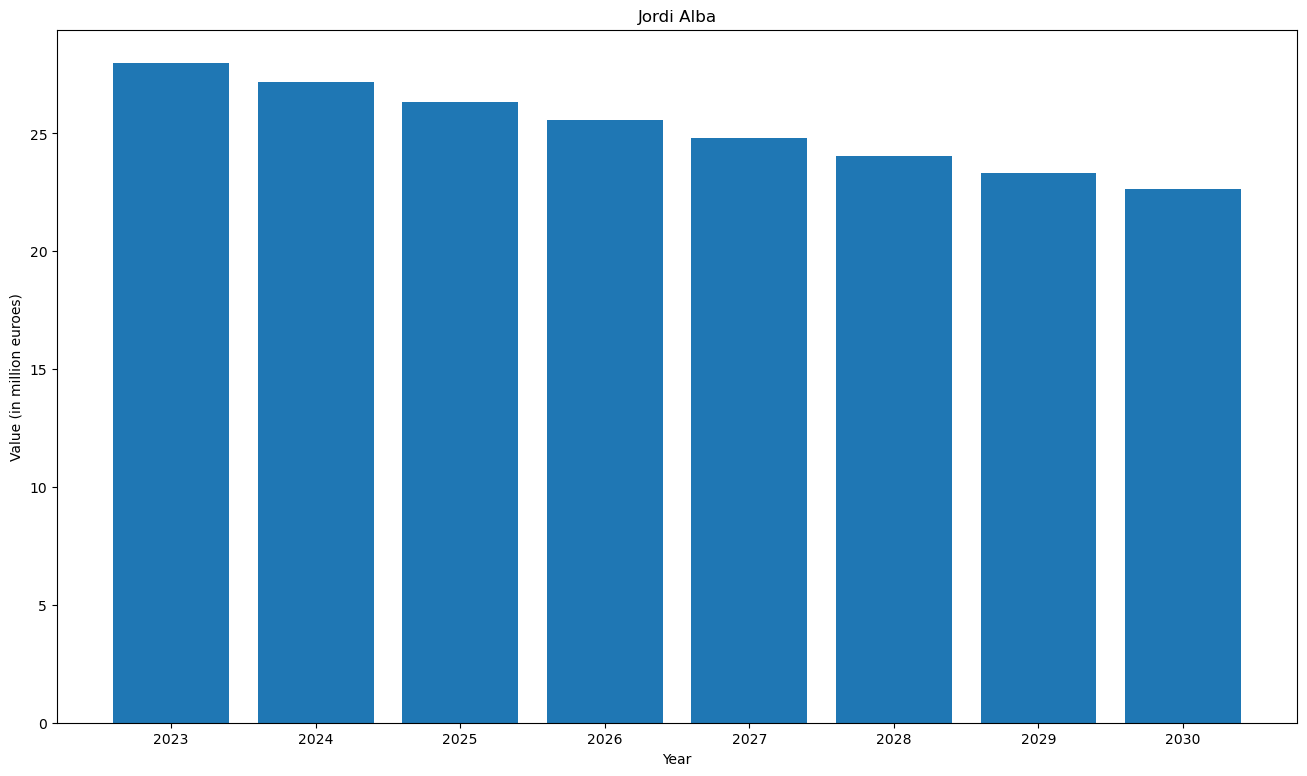

In [6]:
player = input('Enter player\'s name: ')
result = df[df['Name']==player]
if result.empty:
    print('Player not found')
    sys.exit()
year = int(datetime.date.today().year)
temp = int(result['Value'].iloc[0])
value = pd.DataFrame({'Year':[year],'Value':[temp]})
value['Value'] = pd.to_numeric(value['Value'])
value['Year'] = pd.to_numeric(value['Year'])
fac = int(result['Potential'].iloc[0])-int(result['Overall'].iloc[0])
age = int(result['Age'].iloc[0])
end = year+(40-age)
country = result['Nationality'].iloc[0]
if country=='England':
    temp+=(0.02*temp)
prime = [25, 26, 27, 28, 29, 30]
while year<=end:
    res = int(result['Potential'].iloc[0])
    if fac>0:
        if res<60:
            temp+=(1.2*fac*temp/100)
        elif res<70:
            temp+=(1.35*fac*temp/100)
        elif res<80:
            temp+=(1.50*fac*temp/100)
        elif res<90:
            temp+=(1.80*fac*temp/100)
        else:
            temp+=(2*fac*temp/100)
        fac-=2
    if age in prime:
        temp+=(0.02*temp)
    elif age>30 and age<35:
        temp-=(0.015*temp)
    elif age>=35:
        temp-=(0.03*temp)
    else:
        temp+=(0.009*temp)
    add = pd.DataFrame({'Year':[year],'Value':[temp]})
    value = pd.concat([value, add], axis=0, ignore_index=True)
    age+=1
    year+=1  
fig = plt.figure(figsize = (16,9))
plt.bar(value['Year'],value['Value'])
plt.title(player)
plt.xlabel('Year')
plt.ylabel('Value (in million euroes)')
plt.show()